In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

<h1>Introduction</h1>

The price of products is an essential metric when assessing economic conditions. Spikes in the average price of products within a nation can lead to decreased quality of life for its residents, but aggressive drops in price within a nation can indicate faltering economic prominence on a global scale. International economic entities, such as the IMF, are tasked with stabilizing the price of products, and consequently, national economies. To minimize volatility, the IMF must understand how price trends between nations correlate. In this project, I will focus on one specific nation - the UK - and explore how the UK's CPI shifts are associated with those of other countries. This knowledge can help the IMF better understand how to allocate funds and apply pressure through policy.

<h1>Data Description</h1>
<h3>Dataset Information</h3>

The consumer price index measures changes between periods of time in the price level of a category of goods. This dataset contains data ranging from February 1996 to March 2020 of the monthly consumer price indexes for a number of countries. The values represented in the dataframe are harmonized consumer price indices, so they measure standard changes in prices across all major commercial sectors.

<h3>Data Description</h3>

Each observation (row) represents a nation. Each column represents the consumer price indices for a given month. However, when doing our analysis, we will transpose rows and columns for the sake of ease, so each row will correspond to a period and each column will correspond to a nation. This dataset comes from the IMF, so it was probably created to understand global economic trends. Having this dataset would allow the IMF to best develop effective monetary policy. I think that countries with higher economic investment in the operations of the IMF were probably the countries whose data was included in this dataset. Countries with less global economic contribution and investment in the IMF's money supply were probably concluded. My preprocessing tasks were relatively minimal. However, I did have to manually set `utf-8` encoding in my CSV editor, as that was not the initial coding scheme. I got my data from an IMF CPI data website (https://data.imf.org/?sk=4FFB52B2-3653-409A-B471-D47B46D904B5&sId=1485878810680). From that website, click on the link titled "Cross-Country Harmonized Indexes, Period-over-Period Change" to access the data.

<h3>Problems with the Dataset</h3>

The primary problem with the dataset is that a few of the earliest months, as well as a few of the later ones in the dataset, have NaN values. Handling them will be quite easy. I will begin my analysis after the last period at the beginning of the timeframe with Nan values and end it before the month in which the NaN values resume.

<h1>Data Analysis</h1>

In [57]:
df = pd.read_excel('final-data.xlsx', index_col=0)
df.head()

,1996M02,1996M03,1996M04,1996M05,1996M06,1996M07,1996M08,1996M09,1996M10,1996M11,...,2019M06,2019M07,2019M08,2019M09,2019M10,2019M11,2019M12,2020M01,2020M02,2020M03
Austria,0.294365,0.307477,-0.111467,-0.097643,0.307177,0.097439,-0.305938,0.000000,0.209234,0.292316,...,-0.065311,-0.793577,0.075287,1.015610,0.279278,0.185667,0.713491,-0.717637,0.009267,0.537435
Belgium,0.100129,0.200057,0.499144,0.198666,-0.198272,-0.099333,0.000000,0.198864,0.496172,0.000000,...,-0.064719,-0.814136,1.054006,-0.590733,0.287837,0.009258,0.333272,-1.116442,1.464962,-0.386242
Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.028637,1.336771,0.188448,-1.184990,0.152279,0.313599,0.805229,0.498073,0.009351,-0.458158
Croatia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.280736,0.511632,-0.374568,-0.183168,0.241453,-0.385394,-0.135410,-0.125908,-0.455780,0.029226
Cyprus,-3.053550,3.118697,0.451399,0.299581,-0.164277,0.329095,-1.640078,1.834167,0.952664,0.000000,...,1.217460,-0.440055,1.650133,-1.777950,-0.373832,-0.533228,-0.694927,-0.809757,0.151179,0.221395


As mentioned previously, data analysis will require that we work with columns that do not have any `NaN` values in them. Before we start, the columns must be dropped.

In [58]:
df = df.dropna(axis = 1)
df.head()

,2005M01,2005M02,2005M03,2005M04,2005M05,2005M06,2005M07,2005M08,2005M09,2005M10,...,2019M06,2019M07,2019M08,2019M09,2019M10,2019M11,2019M12,2020M01,2020M02,2020M03
Austria,-0.024504,0.330882,0.476365,-0.218818,0.012183,0.255817,-0.206561,0.158286,0.571359,0.048350,...,-0.065311,-0.793577,0.075287,1.015610,0.279278,0.185667,0.713491,-0.717637,0.009267,0.537435
Belgium,-1.305419,2.146244,0.647447,0.194198,0.121139,0.338778,-1.000844,1.814860,-0.035889,-0.143609,...,-0.064719,-0.814136,1.054006,-0.590733,0.287837,0.009258,0.333272,-1.116442,1.464962,-0.386242
Bulgaria,0.645540,0.874636,0.491329,1.164797,-0.170576,-0.412929,0.757792,0.681141,1.183932,0.780053,...,-0.028637,1.336771,0.188448,-1.184990,0.152279,0.313599,0.805229,0.498073,0.009351,-0.458158
Croatia,0.128518,0.847131,0.712740,0.682421,0.150621,0.375987,0.174803,0.012464,-0.037388,0.448822,...,0.280736,0.511632,-0.374568,-0.183168,0.241453,-0.385394,-0.135410,-0.125908,-0.455780,0.029226
Cyprus,-2.239418,-0.383785,0.866843,1.145858,0.177012,0.106020,-1.459167,0.656795,1.672796,1.155193,...,1.217460,-0.440055,1.650133,-1.777950,-0.373832,-0.533228,-0.694927,-0.809757,0.151179,0.221395


Now, we will rename the columns with the number of months from the start month (January 2005).

In [59]:
mapping = {}
column_names_initial = list(df.columns)
for i in range(len(column_names_initial)):
    mapping[column_names_initial[i]] = i
df = df.rename(columns = mapping)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,173,174,175,176,177,178,179,180,181,182
Austria,-0.024504,0.330882,0.476365,-0.218818,0.012183,0.255817,-0.206561,0.158286,0.571359,0.048350,...,-0.065311,-0.793577,0.075287,1.015610,0.279278,0.185667,0.713491,-0.717637,0.009267,0.537435
Belgium,-1.305419,2.146244,0.647447,0.194198,0.121139,0.338778,-1.000844,1.814860,-0.035889,-0.143609,...,-0.064719,-0.814136,1.054006,-0.590733,0.287837,0.009258,0.333272,-1.116442,1.464962,-0.386242
Bulgaria,0.645540,0.874636,0.491329,1.164797,-0.170576,-0.412929,0.757792,0.681141,1.183932,0.780053,...,-0.028637,1.336771,0.188448,-1.184990,0.152279,0.313599,0.805229,0.498073,0.009351,-0.458158
Croatia,0.128518,0.847131,0.712740,0.682421,0.150621,0.375987,0.174803,0.012464,-0.037388,0.448822,...,0.280736,0.511632,-0.374568,-0.183168,0.241453,-0.385394,-0.135410,-0.125908,-0.455780,0.029226
Cyprus,-2.239418,-0.383785,0.866843,1.145858,0.177012,0.106020,-1.459167,0.656795,1.672796,1.155193,...,1.217460,-0.440055,1.650133,-1.777950,-0.373832,-0.533228,-0.694927,-0.809757,0.151179,0.221395


We can begin to look at some summary statistics for the dataset. To avoid getting overly granular, let us start with the periodical mean consumer price index for all countries.

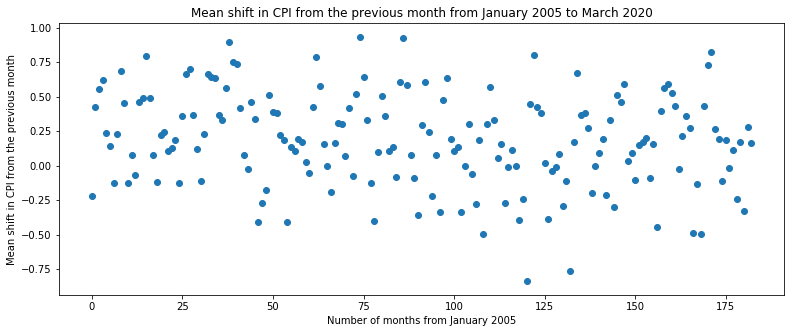

In [60]:
means = []
for i in df.columns:
    means.append(np.mean(df[i].values))

plt.scatter(df.columns, means)
plt.rcParams["figure.figsize"] = (13,5)
plt.xlabel("Number of months from January 2005")
plt.ylabel("Mean shift in CPI from the previous month")
plt.title("Mean shift in CPI from the previous month from January 2005 to March 2020")
plt.show()

Now, let us transpose the columns and rows for ease in processing.

In [61]:
transposed_data = df.T
transposed_data.head()

,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,Denmark,Estonia,Finland,France,...,Poland,Portugal,Romania,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom
0,-0.024504,-1.305419,0.645540,0.128518,-2.239418,0.622665,-0.239234,-0.132939,-0.550728,-0.561141,...,0.000000,-0.507914,0.806192,1.668339,-0.526118,-0.951916,-0.612363,-0.412797,0.250627,-0.516796
1,0.330882,2.146244,0.874636,0.847131,-0.383785,0.000000,0.719424,0.576838,0.639921,0.670115,...,0.000000,-0.047489,0.623800,0.135719,0.654829,0.234105,0.511509,0.310881,0.204545,0.259740
2,0.476365,0.647447,0.491329,0.712740,0.866843,0.000000,0.714286,0.602941,0.403522,0.689011,...,0.000000,0.332581,0.302019,-0.036964,1.050920,0.885065,0.254453,0.206612,0.362894,0.388601
3,-0.218818,0.194198,1.164797,0.682421,1.145858,0.247525,0.472813,0.438532,0.267933,0.173974,...,0.501882,0.745827,1.790808,0.221866,0.049523,1.425612,0.173050,0.824742,0.406780,0.387097
4,0.012183,0.121139,-0.170576,0.150621,0.177012,0.000000,0.000000,0.261971,-0.364387,0.069469,...,0.249688,0.564042,0.311381,0.122986,0.358866,0.156175,0.115168,-0.102249,1.215395,0.385604


Now, let us look at some basic summary statistics for the datasets.

In [62]:
print("Mean CPI shift for any given month:", np.mean(transposed_data.values))
print("Standard deviation of CPI shift for a month", np.std(transposed_data.values))
print("\n")
print("Mean CPI shift for each country:")
mean_cpis = []
for column in transposed_data.columns: 
    mean_cpi = np.mean(transposed_data[column].values)
    mean_cpis.append(mean_cpi)
    print("\t", column, mean_cpi)
print("Standard deviation of mean CPI shift for each country:", np.std(mean_cpis))

Mean CPI shift for any given month: 0.18570515986594757
Standard deviation of CPI shift for a month 0.668108703544184


Mean CPI shift for each country:
	 Austria 0.1568138926415932
	 Belgium 0.16247716829017472
	 Bulgaria 0.2455334557086611
	 Croatia 0.1526020729320589
	 Cyprus 0.08877091631853008
	 Czech Republic 0.17706869012862064
	 Denmark 0.11320863290262022
	 Estonia 0.26618466861272594
	 Finland 0.13263194327395356
	 France 0.11453423927772588
	 Germany 0.12207941353466435
	 Greece 0.12150947870215155
	 Hungary 0.2831524706064035
	 Iceland 0.3256513572046604
	 Ireland 0.06808925062053232
	 Italy 0.1261390494950364
	 Latvia 0.2904629723600342
	 Lithuania 0.24583430034192705
	 Luxembourg 0.163747019288122
	 Malta 0.1579068908518721
	 Netherlands 0.12999848737784972
	 Norway 0.16960695463329872
	 Poland 0.16510900541681756
	 Portugal 0.11309849557429376
	 Romania 0.3171532199889018
	 Slovak Republic 0.16843030464582395
	 Slovenia 0.1510070252948288
	 Spain 0.13370715420465795
	 Sw

<h1>Evaluation of Significance</h1>

We can now lay out some hypotheses to explore, with a focus on the United Kingdom.

**Null Hypothesis** There is no association between the CPI shifts of the United Kingdom and those of any other country.

**Alternative Hypothesis**: There is an association between the CPI shifts of the United Kingdom and those of other countries.

To test the association, we will develop a linear regression between the UK's CPI shifts and those of every other nation in the dataframe.

In [63]:
uk_vals = transposed_data["United Kingdom"]
reg_data = {"Country": [], "Slope": [], "Intercept": []}
for column in transposed_data.columns:
    if column != "United Kingdom":
        reg = LinearRegression().fit(uk_vals.values.reshape(-1,1), transposed_data[column])
        reg_data["Country"].append(column)
        reg_data["Slope"].append(reg.coef_[0])
        reg_data["Intercept"].append(reg.intercept_)
reg_df = pd.DataFrame(reg_data)
reg_df.head()

,Country,Slope,Intercept
0,Austria,0.755617,0.016372
1,Belgium,1.982129,-0.205928
2,Bulgaria,0.074523,0.231682
3,Croatia,0.343069,0.088838
4,Cyprus,1.414317,-0.174099


Let us define the function `standard_error`, which will pass two lists x and y, a slope, and an intercept, and return the standard error of the regression.

In [64]:
def standard_error(x, y, slope, intercept):
    assert(len(x) == len(y))
    num_sum = 0
    for i in range(len(x)):
        y_pred = x[i]*slope + intercept
        num_sum += (y[i] - y_pred)**2
    return (num_sum/len(x))**(1/2)    

Now, we can iterate over the `reg_df`, calculating the standard errror for each regression, and finally append all standard error information to a new column.

In [65]:
standard_errors = []
for i in range(len(reg_df['Country'])):
    curr_row = reg_df.loc[i]
    standard_errors.append(standard_error(uk_vals, transposed_data[curr_row['Country']], curr_row['Slope'], curr_row['Intercept']))
reg_df["Standard Error"] = standard_errors

Let's look at the countries with the lowest standard error.

In [66]:
reg_df.sort_values(by = "Standard Error", inplace = True, ascending = True)
reg_df.head()

,Country,Slope,Intercept,Standard Error
9,France,0.689246,-0.013571,0.283028
8,Finland,0.489154,0.041716,0.292797
22,Poland,0.152208,0.136819,0.295197
29,Switzerland,0.491430,-0.069199,0.327018
28,Sweden,0.725557,-0.018171,0.327970


The test statistic $t$ is defined as follows: $$t = \frac{m}{SE}$$ where $m$ is the slope of the regression line and $SE$ is the standard error. We can calculate $t$ for each regression.

In [67]:
reg_df["t"] = reg_df['Slope'].values/reg_df['Standard Error'].values
reg_df.head()

,Country,Slope,Intercept,Standard Error,t
9,France,0.689246,-0.013571,0.283028,2.435259
8,Finland,0.489154,0.041716,0.292797,1.670627
22,Poland,0.152208,0.136819,0.295197,0.515616
29,Switzerland,0.491430,-0.069199,0.327018,1.502761
28,Sweden,0.725557,-0.018171,0.327970,2.212269


In [68]:
dof = len(uk_vals) - 2
print("Degrees of freedom:", dof)

Degrees of freedom: 181


Using a standard t-distribution table, we can find an ideal cutoff. Let us take a significance level of $P = 0.05$. Given that we have 181, degrees of freedom, a simple lookup in a t-distribution table will tell us that that the two-tailed t-value cutoff for $P = 0.05$ is $t = \pm 1.973157$. Therefore, for all countries such that $t\geq 1.973157$ or $t\leq -1.973157$, there is less than a $5%$ probability that the null hypothesis is correct. Let us see which countries these are.

In [69]:
is_significant = []
for t in reg_df['t']:
    if t>=1.973157 or t<=-1.973157:
        is_significant.append(True)
    else:
        is_significant.append(False)
reg_df['Significant'] = is_significant
reg_df.sort_values(by = 'Significant', inplace = True, ascending = False)
significant_df = reg_df.loc[reg_df['Significant']==True]
print("Countries with a significant CPI correlation to the UK: ", )
significant_df

Countries with a significant CPI correlation to the UK: 


,Country,Slope,Intercept,Standard Error,t,Significant
9,France,0.689246,-0.013571,0.283028,2.435259,True
14,Ireland,0.785077,-0.077828,0.338902,2.316530,True
26,Slovenia,0.929359,-0.021727,0.462801,2.008116,True
27,Spain,1.399817,-0.126468,0.669219,2.091717,True
1,Belgium,1.982129,-0.205928,0.702572,2.821245,True
18,Luxembourg,1.433651,-0.102716,0.517117,2.772390,True
28,Sweden,0.725557,-0.018171,0.327970,2.212269,True


<h1>Conclusion</h1>

After P-value testing, we know that a few countries have shifts in CPI that can be linearly associated with those of the United Kingdom. Those countries are France, Ireland, Slovenia, Spain, Belgium, Luxembourg, and Sweden. For these countries, we accept the alternative hypothesis. However, all other countries exceed the P-value cutoff, so for those countries, we fail to reject the null hypothesis. This could possibly be because the United Kingdom has close physical proximity for many of these countries. Also, most of them are large contributors within the European Economic Zone, as is the UK. It's hard to establish the direction of causality here. While it is possible that hits to the UK's CPI do immediately cause hits to the economy of these seven other countries, it is also likely that the nations are invested in the same industries, and industry change is teh causal factor. Free trade agreements mean that product prices within these nations are likely impacted similarly by global economic phenomena.

<h1>Source Code</h1>
    
The source code for this project can be found in the notebook named `phase_3.ipynb` under the repository at https://github.com/ishaanbakhle/INFO2950-Final-Project.  

<h1>Acknowledgements</h1>

For my t-distribution lookup in my evaluation of significance, I used the following source: https://www.meracalculator.com/math/t-distribution-critical-value-table.php. The data source is from the IMF's website. The link is in the data description section.